In [1]:
#importing libraries and modules

import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import keras
import seaborn as sn
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
# mounting my google drive in colab to access the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzipping the zipped dataset file
# the dataset is made up of 10 different hand-gestures performed by 5 men and 5 women
!unzip '/content/drive/MyDrive/DLOps_project/HandGestureDataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [4]:
# predefining all the labels in our dataset and storing them in a matrix
labels = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

IMG_SIZE = 50

# defining a path for the dataset to be accessed
path_to_data = "/content/leapgestrecog/leapGestRecog"

In [5]:
# Loading all the images as well as their label values i.e 0-9
image_dataset = []
for dr in os.listdir(path_to_data):
    for category in labels:
        class_indx = labels.index(category)
        path = os.path.join(path_to_data, dr, category)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_dataset.append([cv2.resize(image_array, (IMG_SIZE, IMG_SIZE)), class_indx])
            except Exception as e:
                pass
image_dataset[0]

[array([[4, 4, 5, ..., 5, 4, 4],
        [5, 5, 3, ..., 4, 4, 3],
        [4, 4, 4, ..., 5, 4, 4],
        ...,
        [4, 5, 4, ..., 5, 5, 5],
        [5, 5, 4, ..., 5, 4, 3],
        [3, 3, 3, ..., 6, 4, 4]], dtype=uint8), 0]

In [6]:
# shuffling the input data
random.shuffle(image_dataset)

In [7]:
#seperating the image and label into different matrices
input = []
label = []
for x, y in image_dataset:
    input.append(x)
    label.append(y)

In [8]:
#printing the values of labels of first 10 images
label[:10]

[4, 7, 5, 5, 9, 2, 0, 6, 3, 0]

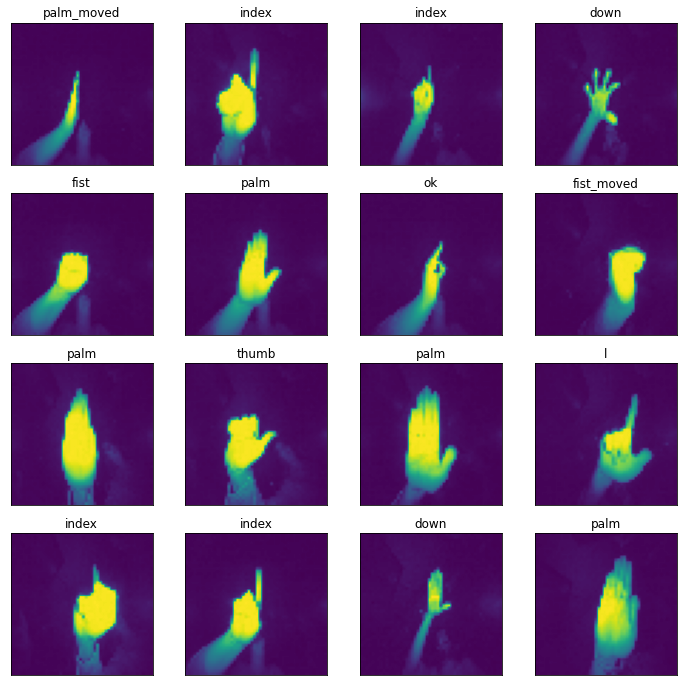

In [9]:
plt.figure(1, figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image_dataset[i+1][0])
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[label[i+1]][3:])
plt.show()

In [10]:
# Normalizing the data
input = np.array(input)
label = np.array(label)
input = input/255.0
input.shape

(20000, 50, 50)

In [11]:
# Using one-hot encoding to encode the labels
label = keras.utils.np_utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [12]:
# reshaping the data
input.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
# splitting the input to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, label, test_size = 0.3, random_state=0)

In [14]:
model = keras.models.Sequential()

# 1st convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
# activation function
model.add(Activation('relu'))
# 2nd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3)))
# activation function
model.add(Activation('relu'))
# 1st pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# dropout layer
model.add(Dropout(0.3))
# 2nd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
# activation function
model.add(Activation('relu'))
# 2nd pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# dropout layer
model.add(Dropout(0.3))
# flattening the data to feed into neurons
model.add(Flatten())
model.add(Dense(256, activation='relu'))    #dense layer with 256 neurons
model.add(Dense(10, activation='softmax'))  #dense layer with 10 neurons

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [15]:
#fitting the model
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 112s 252ms/step - loss: 0.3409 - accuracy: 0.8887 - val_loss: 0.0209 - val_accuracy: 0.9938
Epoch 2/7
438/438 [==============================] - 110s 252ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0064 - val_accuracy: 0.9987
Epoch 3/7
438/438 [==============================] - 110s 252ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 4/7
438/438 [==============================] - 112s 256ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 5/7
438/438 [==============================] - 111s 254ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0074 - val_accuracy: 0.9992
Epoch 6/7
438/438 [==============================] - 111s 253ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 7/7
438/438 [==============================] - 111s 253ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0059 - val_ac

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

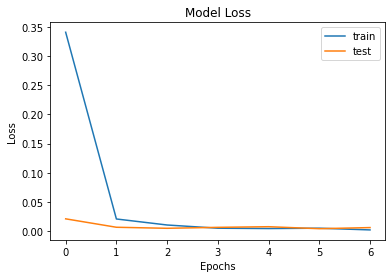

In [17]:
# plotting the loss vs. epochs graph
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

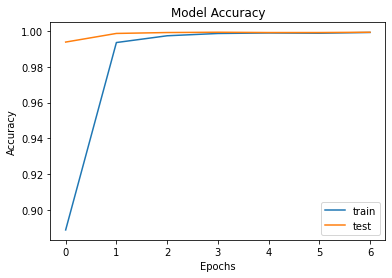

In [18]:
# plotting the loss vs. epochs graph
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
#calculate the loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 10s 54ms/step - loss: 0.0059 - accuracy: 0.9993
Test accuracy: 99.93%


[]

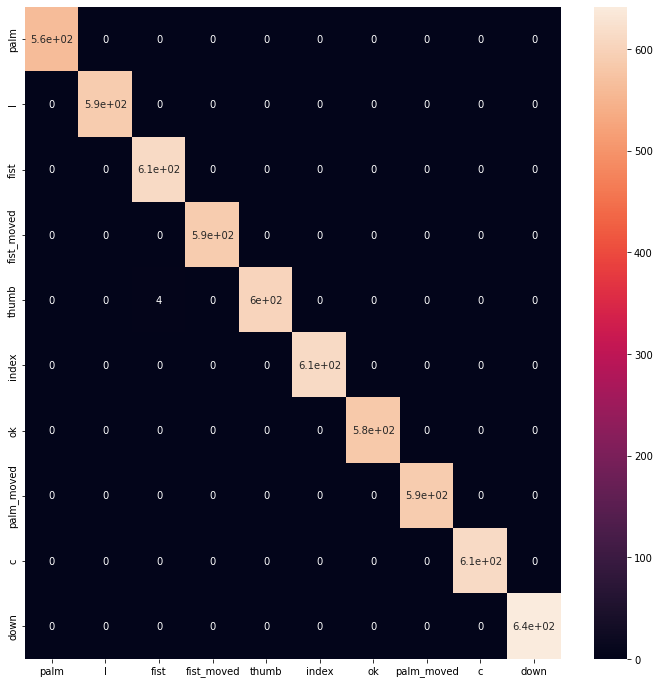

In [20]:
# printing the confusion matrix
from sklearn.metrics import confusion_matrix
cat = [c[3:] for c in labels]
plt.figure(figsize=(12,12))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()